In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# Define paths
# Data from https://aqs.epa.gov/aqsweb/airdata/download_files.html
path15 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2015.csv'
path16 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2016.csv'
path17 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2017.csv'
path18 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2018.csv'
path19 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2019.csv'
path20 = '../01_Resources/EPA_AQI_data/daily_aqi_by_county_2020.csv'

In [74]:
# Read in data for six year of AQI data
df15 = pd.DataFrame(pd.read_csv(path15))
df16 = pd.DataFrame(pd.read_csv(path16))
df17 = pd.DataFrame(pd.read_csv(path17))
df18 = pd.DataFrame(pd.read_csv(path18))
df19 = pd.DataFrame(pd.read_csv(path19))
df20 = pd.DataFrame(pd.read_csv(path20))

df19

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2019-01-03,18,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2019-01-06,35,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2019-01-09,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2019-01-12,36,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2019-01-15,38,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
340164,Wyoming,Weston,56,45,2019-12-27,36,Good,Ozone,56-045-0003,2
340165,Wyoming,Weston,56,45,2019-12-28,37,Good,Ozone,56-045-0003,2
340166,Wyoming,Weston,56,45,2019-12-29,34,Good,Ozone,56-045-0003,2
340167,Wyoming,Weston,56,45,2019-12-30,36,Good,Ozone,56-045-0003,2


In [75]:
# Append all six years into one DF
five_years_df = df15.append([df16,df17,df18,df19], ignore_index=True)

In [76]:
# Split "Date" column into "Year", "Month", and "Day" columns
five_years_df['Year'] = [d.split('-')[0] for d in five_years_df.Date]
five_years_df['Month'] = [d.split('-')[1] for d in five_years_df.Date]
five_years_df['Day'] = [d.split('-')[2] for d in five_years_df.Date]

# Create column to hold Month and Day w/o year
# This is to compare specific days across all six years
# TODO: Find a cleaner, more effective way to do this
five_years_df['Month_Day'] = five_years_df['Month'] + '-' + five_years_df['Day']

# Change type from str to int64
five_years_df = five_years_df.astype({'Year': 'int64','Month': 'int64','Day': 'int64'})

# Drop unneeded columns
five_years_df = five_years_df.drop(columns={'State Code','Defining Site'})

# Limit DF to days before June
before_june_df = five_years_df.loc[five_years_df['Month']<6]

# Check result
before_june_df

,State Name,county Name,County Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,Year,Month,Day,Month_Day
0,Alabama,Baldwin,3,2015-01-03,28,Good,PM2.5,1,2015,1,3,01-03
1,Alabama,Baldwin,3,2015-01-06,48,Good,PM2.5,1,2015,1,6,01-06
2,Alabama,Baldwin,3,2015-01-09,55,Moderate,PM2.5,1,2015,1,9,01-09
3,Alabama,Baldwin,3,2015-01-12,41,Good,PM2.5,1,2015,1,12,01-12
4,Alabama,Baldwin,3,2015-01-15,26,Good,PM2.5,1,2015,1,15,01-15
...,...,...,...,...,...,...,...,...,...,...,...,...
1683977,Wyoming,Weston,45,2019-05-27,46,Good,Ozone,2,2019,5,27,05-27
1683978,Wyoming,Weston,45,2019-05-28,43,Good,Ozone,2,2019,5,28,05-28
1683979,Wyoming,Weston,45,2019-05-29,71,Moderate,Ozone,2,2019,5,29,05-29
1683980,Wyoming,Weston,45,2019-05-30,61,Moderate,Ozone,2,2019,5,30,05-30


In [79]:
# Split "Date" column into "Year", "Month", and "Day" columns
df20['Year'] = [d.split('-')[0] for d in df20.Date]
df20['Month'] = [d.split('-')[1] for d in df20.Date]
df20['Day'] = [d.split('-')[2] for d in df20.Date]

# Create column to hold Month and Day w/o year
# This is to compare specific days across all six years
# TODO: Find a cleaner, more effective way to do this
df20['Month_Day'] = df20['Month'] + '-' + df20['Day']

# Change type from str to int64
df20 = df20.astype({'Year': 'int64','Month': 'int64','Day': 'int64'})

# Drop unneeded columns
# df20 = df20.drop(columns={'State Code','Defining Site'})

# Limit DF to days before June
df20 = df20.loc[df20['Month']<6]

# Check result
df20

,State Name,county Name,County Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,Year,Month,Day,Month_Day
0,Alabama,Baldwin,3,2020-01-01,48,Good,PM2.5,1,2020,1,1,01-01
1,Alabama,Baldwin,3,2020-01-04,13,Good,PM2.5,1,2020,1,4,01-04
2,Alabama,Baldwin,3,2020-01-07,14,Good,PM2.5,1,2020,1,7,01-07
3,Alabama,Baldwin,3,2020-01-10,39,Good,PM2.5,1,2020,1,10,01-10
4,Alabama,Baldwin,3,2020-01-13,29,Good,PM2.5,1,2020,1,13,01-13
...,...,...,...,...,...,...,...,...,...,...,...,...
41245,Wyoming,Uinta,41,2020-03-27,5,Good,PM10,2,2020,3,27,03-27
41246,Wyoming,Uinta,41,2020-03-28,6,Good,PM10,2,2020,3,28,03-28
41247,Wyoming,Uinta,41,2020-03-29,6,Good,PM10,2,2020,3,29,03-29
41248,Wyoming,Uinta,41,2020-03-30,5,Good,PM10,2,2020,3,30,03-30


In [80]:
five_year_avg = before_june_df.groupby(['County Code','Month_Day'])['AQI'].mean().reset_index()
five_year_avg = five_year_avg.rename(columns={'AQI':'Five-Year Avg.'})
five_year_avg

,County Code,Month_Day,Five-Year Avg.
0,1,01-01,36.950413
1,1,01-02,38.042735
2,1,01-03,43.327731
3,1,01-04,40.271186
4,1,01-05,38.921739
...,...,...,...
25010,840,05-25,6.000000
25011,840,05-26,13.000000
25012,840,05-27,9.000000
25013,840,05-30,11.500000


In [87]:
avg_20 = df20.groupby(['County Code','Month_Day'], as_index=False).mean()
avg_20 = avg_20.rename(columns={'AQI':'Avg. AQI'})
avg_20 = avg_20.drop(columns=['Number of Sites Reporting','Year','Month','Day'])
avg_20



,County Code,Month_Day,Avg. AQI
0,1,01-01,19.200000
1,1,01-02,23.928571
2,1,01-03,24.857143
3,1,01-04,24.866667
4,1,01-05,18.000000
...,...,...,...
11216,840,02-21,6.000000
11217,840,02-27,2.000000
11218,840,03-04,3.000000
11219,840,03-10,6.000000


143

In [95]:
compare_df = pd.merge(df20, five_year_avg,  how='left', 
                      left_on=['County Code','Month_Day'], 
                      right_on = ['County Code','Month_Day'])
compare_df                                                      

,State Name,county Name,County Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,Year,Month,Day,Month_Day,Five-Year Avg.
0,Alabama,Baldwin,3,2020-01-01,48,Good,PM2.5,1,2020,1,1,01-01,36.239316
1,Alabama,Baldwin,3,2020-01-04,13,Good,PM2.5,1,2020,1,4,01-04,34.163793
2,Alabama,Baldwin,3,2020-01-07,14,Good,PM2.5,1,2020,1,7,01-07,40.389831
3,Alabama,Baldwin,3,2020-01-10,39,Good,PM2.5,1,2020,1,10,01-10,35.122807
4,Alabama,Baldwin,3,2020-01-13,29,Good,PM2.5,1,2020,1,13,01-13,34.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41245,Wyoming,Uinta,41,2020-03-27,5,Good,PM10,2,2020,3,27,03-27,35.542373
41246,Wyoming,Uinta,41,2020-03-28,6,Good,PM10,2,2020,3,28,03-28,36.393443
41247,Wyoming,Uinta,41,2020-03-29,6,Good,PM10,2,2020,3,29,03-29,40.344828
41248,Wyoming,Uinta,41,2020-03-30,5,Good,PM10,2,2020,3,30,03-30,38.754386


In [113]:
baldwin = compare_df.loc[compare_df['Month']==3]
baldwin = baldwin.loc[baldwin['State Name']=='Texas']
baldwin

,State Name,county Name,County Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,Year,Month,Day,Month_Day,Five-Year Avg.
34800,Texas,Bexar,29,2020-03-01,45,Good,PM2.5,3,2020,3,1,03-01,33.785714
34801,Texas,Bexar,29,2020-03-02,59,Moderate,PM2.5,3,2020,3,2,03-02,33.012195
34802,Texas,Bexar,29,2020-03-03,63,Moderate,PM2.5,3,2020,3,3,03-03,32.500000
34803,Texas,Bexar,29,2020-03-04,20,Good,PM2.5,3,2020,3,4,03-04,34.152941
34804,Texas,Bexar,29,2020-03-05,28,Good,PM2.5,2,2020,3,5,03-05,33.060241
34805,Texas,Bexar,29,2020-03-06,30,Good,PM2.5,3,2020,3,6,03-06,35.506173
34806,Texas,Bexar,29,2020-03-07,46,Good,PM2.5,3,2020,3,7,03-07,37.705882
34807,Texas,Bexar,29,2020-03-08,35,Good,PM2.5,3,2020,3,8,03-08,38.682927
34808,Texas,Bexar,29,2020-03-09,45,Good,PM2.5,3,2020,3,9,03-09,37.035714
34809,Texas,Bexar,29,2020-03-10,54,Moderate,PM2.5,3,2020,3,10,03-10,36.232558


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text xticklabel objects>)

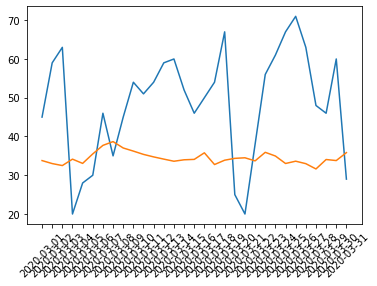

In [114]:
plt.plot(baldwin['Date'], baldwin['AQI'])
plt.plot(baldwin['Date'], baldwin['Five-Year Avg.'])
plt.xticks(rotation=45)